<a href="https://colab.research.google.com/github/Aakash-Suneja/IMAGE_RECOGNISATION_ML/blob/IMAGE-RECOGNISATION/IMAGE_RECOGNISATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY **1**


In [ ]:
pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakashsuneja","key":"a2cc4e38e4163d878d3722ab55503527"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
 import tensorflow as tf
(X_train,Y_train),(X_test,Y_test)= tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape} Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)


In [ ]:
X_train= X_train/ 255.0
X_test= X_test/ 255.0
X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


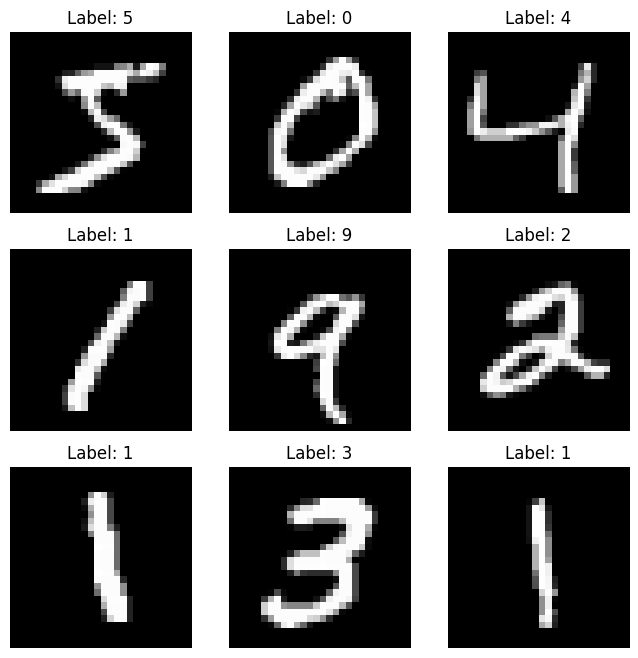

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label: {Y_train[i]}")
  plt.axis('off')
plt.show()



In [ ]:
(X_train_c10,Y_train_c10),(X_test_c10,Y_test_c10)= tf.keras.datasets.cifar10.load_data()
X_train_c10= X_train_c10/ 255.0
X_test_c10= X_test_c10/ 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


DAY 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model= Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history= model.fit(X_train,Y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8935 - loss: 0.3387 - val_accuracy: 0.9747 - val_loss: 0.0868
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9843 - loss: 0.0492 - val_accuracy: 0.9851 - val_loss: 0.0530
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 0.9861 - val_loss: 0.0483
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9902 - val_loss: 0.0392
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9887 - val_loss: 0.0451


/tmp/ipython-input-4175746320.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


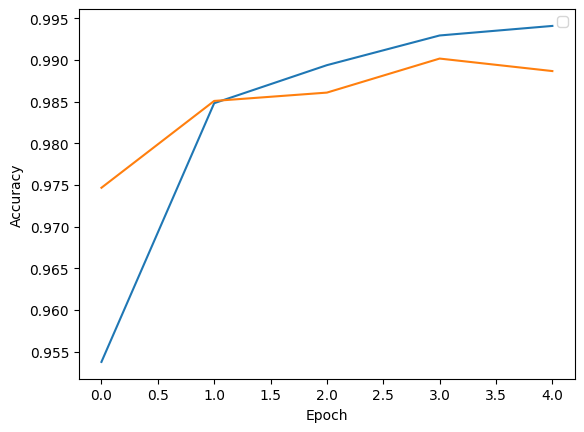

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0440
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model= Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


DAY 3


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,Y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,Y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 87ms/step - accuracy: 0.3399 - loss: 1.7899 - val_accuracy: 0.5134 - val_loss: 1.3672
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.5202 - loss: 1.3446 - val_accuracy: 0.4839 - val_loss: 1.5254
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 81ms/step - accuracy: 0.5746 - loss: 1.1974 - val_accuracy: 0.6222 - val_loss: 1.0960
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.6079 - loss: 1.1039 - val_accuracy: 0.6272 - val_loss: 1.0762
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6291 - loss: 1.0598 - val_accuracy: 0.6229 - val_loss: 1.0991
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.6415 - loss: 1.0270 - val_accuracy: 0.6848 - val_loss: 0.9095
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 82ms/step - accuracy: 0.6576 - loss: 0.9877 - val_accuracy: 0.6894 - val_loss: 0.9232
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.6660 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1000
           1       0.74      0.91      0.82      1000
           2       0.77      0.29      0.42      1000
           3       0.63      0.32      0.42      1000
           4       0.66      0.48      0.56      1000
           5       0.67      0.58      0.62      1000
           6       0.40      0.96      0.56      1000
           7       0.73      0.76      0.74      1000
           8       0.89      0.71      0.79      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.65     10000
   macro avg       0.70      0.65      0.64     10000
weighted avg       0.70      0.65      0.64     10000



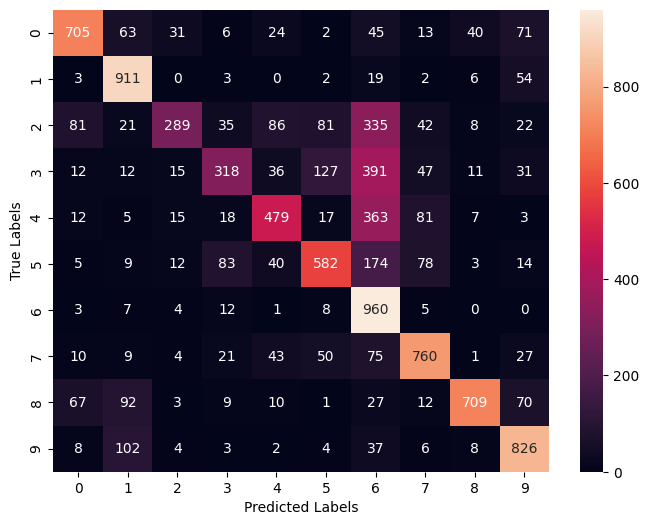

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(Y_test_c10,y_pred) # Corrected variable name
print(classification_report(Y_test_c10,y_pred)) # Corrected variable name

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

DAY 4


In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 76% 165M/218M [00:00<00:00, 603MB/s] 
100% 218M/218M [00:00<00:00, 316MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
!ls /content/dogs-vs-cats

test_set  training_set


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator= datagen.flow_from_directory(
    '/content/dogs-vs-cats/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset='training'
)
val_generator= datagen.flow_from_directory(
    '/content/dogs-vs-cats/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation'
)

Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model= MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model= Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid') # Corrected activation
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.9872 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 4.6692e-09
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 1.0000 - loss: 7.8597e-09 - val_accuracy: 1.0000 - val_loss: 4.6653e-09
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 1.0000 - loss: 7.9960e-09 - val_accuracy: 1.0000 - val_loss: 4.6599e-09
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 1.0000 - loss: 8.0459e-09 - val_accuracy: 1.0000 - val_loss: 4.6530e-09
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 1.0000 - loss: 8.7256e-09 - val_accuracy: 1.0000 - val_loss: 4.6444e-09


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
201/201 ━━━━━━━━━━━━━━━━━━━━ 1425s 7s/step - accuracy: 1.0000 - loss: 2.7895e-09 - val_accuracy: 1.0000 - val_loss: 4.1826e-09
Epoch 2/3
201/201 ━━━━━━━━━━━━━━━━━━━━ 1408s 7s/step - accuracy: 1.0000 - loss: 4.3416e-09 - val_accuracy: 1.0000 - val_loss: 3.5194e-09
Epoch 3/3
201/201 ━━━━━━━━━━━━━━━━━━━━ 1398s 7s/step - accuracy: 1.0000 - loss: 1.2833e-09 - val_accuracy: 1.0000 - val_loss: 2.8821e-09


In [ ]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

51/51 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


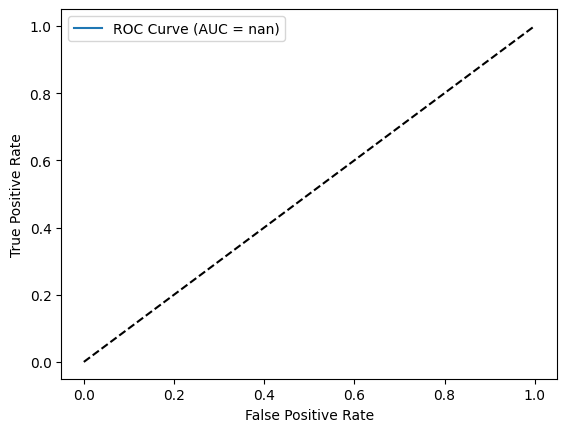

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

DAY 5

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Get the filename from the uploaded dictionary
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving top-10-cutest-cat-photos-of-all-time.webp to top-10-cutest-cat-photos-of-all-time (1).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Cat


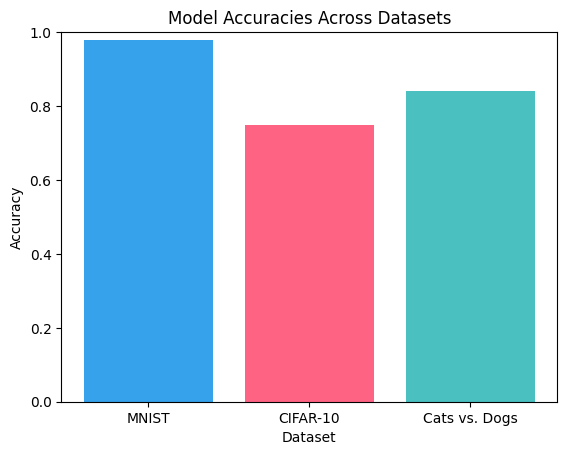

In [ ]:

import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()